## 1. Cargar el dataset

In [6]:
import pandas as pd

# Ruta del archivo
ruta = '../data/winequality-white.csv'

# Cargar los datos
df = pd.read_csv(ruta, sep=';')

# Mostrar primeras filas
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# Información del dataset
df.info()

# Descripción estadística
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## 2. Información general

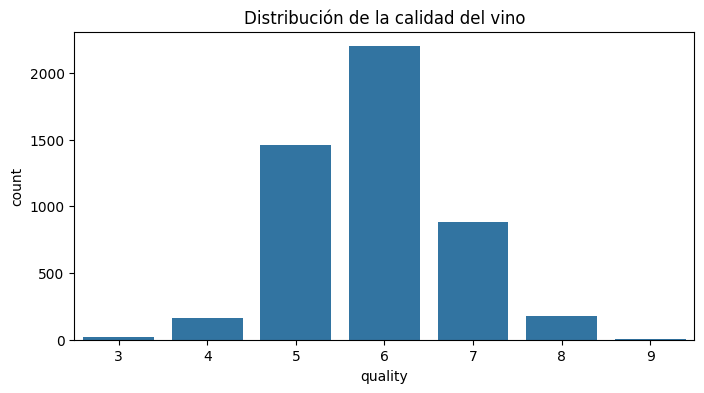

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de calidad
plt.figure(figsize=(8, 4))
sns.countplot(x='quality', data=df)
plt.title('Distribución de la calidad del vino')
plt.show()


## 4. Análisis de correlaciones

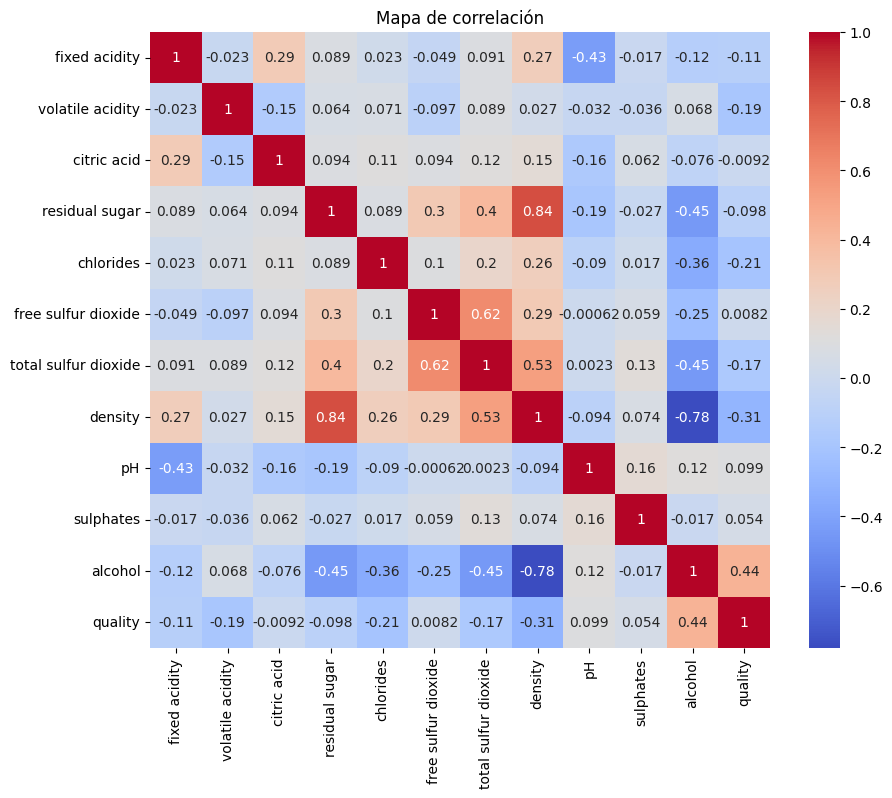

In [9]:
# Correlación entre variables
corr = df.corr()

# Visualizar
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de correlación')
plt.show()


## 5. Análisis de relación entre variables y calidad

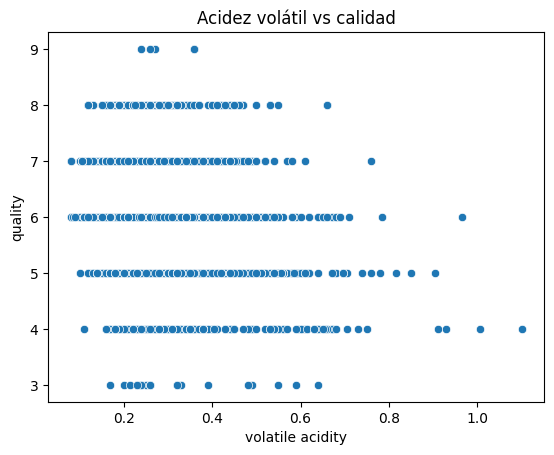

In [10]:
# Ejemplo: relación de acidez y calidad
sns.scatterplot(x='volatile acidity', y='quality', data=df)
plt.title('Acidez volátil vs calidad')
plt.show()

# Repite con otras variables


## 6. Profundizar en la exploración

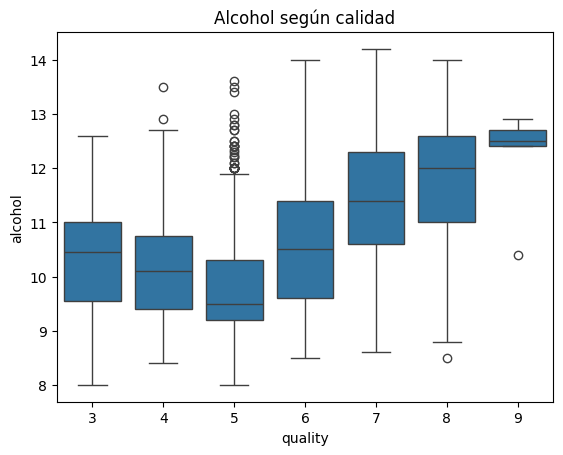

In [11]:
import seaborn as sns
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Alcohol según calidad')
plt.show()


## 7. Revisión de outliers

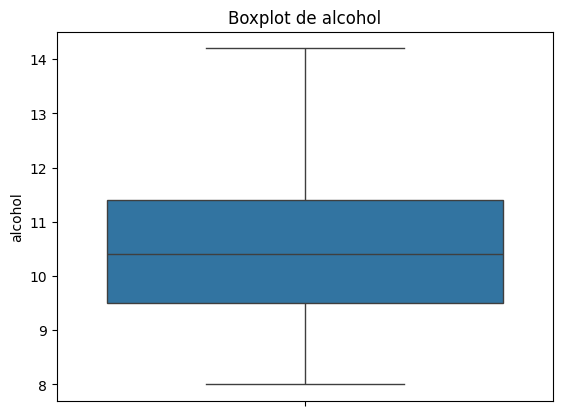

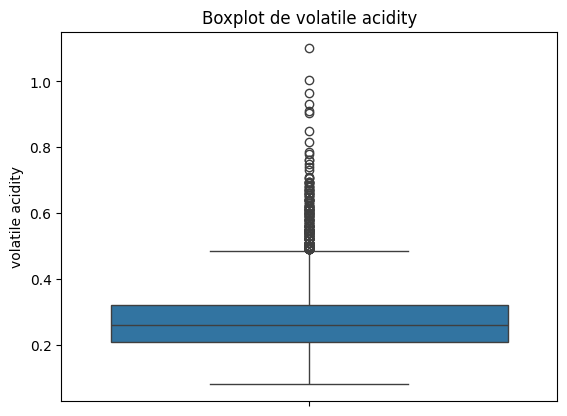

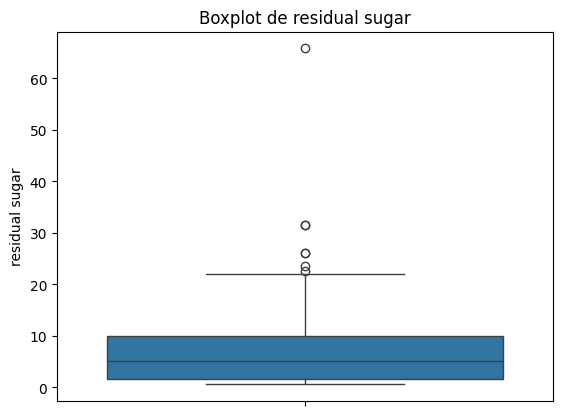

In [12]:
for col in ['alcohol', 'volatile acidity', 'residual sugar']:
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot de {col}')
    plt.show()


## 8. Codificación de la variable target:

In [13]:
# Binaria: calidad alta (>=7) o baja (<7)
df['quality_bin'] = (df['quality'] >= 7).astype(int)


## 9. Primer modelo de prueba

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df.drop(['quality', 'quality_bin'], axis=1)
y = df['quality_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.96      0.93       768
           1       0.81      0.64      0.72       212

    accuracy                           0.89       980
   macro avg       0.86      0.80      0.82       980
weighted avg       0.89      0.89      0.89       980



El análisis exploratorio revela que la mayoría de vinos tienen calidad 5-6, y existe desbalance entre clases. El primer modelo (Random Forest) logra accuracy de 0.89, pero el recall para vinos de calidad alta es bajo, indicando dificultad para captar esos casos. Al observar los boxplots de alcohol y azúcar residual, parecen influir relativamente en la calidad, mientras que variables como la acidez presentan muchos outliers y correlación variable. Se recomienda probar balanceo de clases y ajuste de hiperparámetros para mejorar la sensibilidad en la predicción de vinos sobresalientes.


## Balanceo de clases en Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Features y target
X = df.drop(['quality', 'quality_bin'], axis=1)
y = df['quality_bin']

# Split de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Modelo con balance de clases
rf_balanced = RandomForestClassifier(
    n_estimators=100, class_weight='balanced', random_state=42
)
rf_balanced.fit(X_train, y_train)
y_pred_balanced = rf_balanced.predict(X_test)

print("Random Forest con balanceo de clases:")
print(classification_report(y_test, y_pred_balanced))


Random Forest con balanceo de clases:
              precision    recall  f1-score   support

           0       0.90      0.98      0.93       768
           1       0.88      0.58      0.70       212

    accuracy                           0.89       980
   macro avg       0.89      0.78      0.82       980
weighted avg       0.89      0.89      0.88       980



## Búsqueda manual de hiperparámetros

In [16]:
import numpy as np

results = []
for n_estimators in [50, 100, 200]:
    for max_depth in [None, 5, 10]:
        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            class_weight='balanced',
            random_state=42
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        results.append({
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'accuracy': report['accuracy'],
            'f1_high_quality': report['1']['f1-score'],
            'f1_low_quality': report['0']['f1-score']
        })

import pandas as pd
pd.DataFrame(results)


,n_estimators,max_depth,accuracy,f1_high_quality,f1_low_quality
0,50,NaN,0.883673,0.676136,0.929104
1,50,5.0,0.753061,0.575439,0.825899
2,50,10.0,0.857143,0.711934,0.905020
3,100,NaN,0.892857,0.702550,0.934661
4,100,5.0,0.758163,0.584939,0.829374
5,100,10.0,0.857143,0.710744,0.905149
6,200,NaN,0.886735,0.683761,0.931013
7,200,5.0,0.756122,0.584348,0.827437
8,200,10.0,0.856122,0.710472,0.904277


##  Registrar experimentos básicos en MLflow desde el notebook

In [17]:
import mlflow

for n_estimators in [50, 100, 200]:
    for max_depth in [None, 5, 10]:
        with mlflow.start_run():
            rf = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                class_weight='balanced',
                random_state=42
            )
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            report = classification_report(y_test, y_pred, output_dict=True)
            
            # Params
            mlflow.log_param('n_estimators', n_estimators)
            mlflow.log_param('max_depth', max_depth)
            mlflow.log_param('class_weight', 'balanced')
            
            # Metrics
            mlflow.log_metric('accuracy', report['accuracy'])
            mlflow.log_metric('f1_high_quality', report['1']['f1-score'])
            mlflow.log_metric('f1_low_quality', report['0']['f1-score'])
            
            # Artifact: classification report como texto
            with open("classification_report.txt", "w") as f:
                f.write(classification_report(y_test, y_pred))
            mlflow.log_artifact("classification_report.txt")
